In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

In [16]:
# load in data set
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

In [17]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [19]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

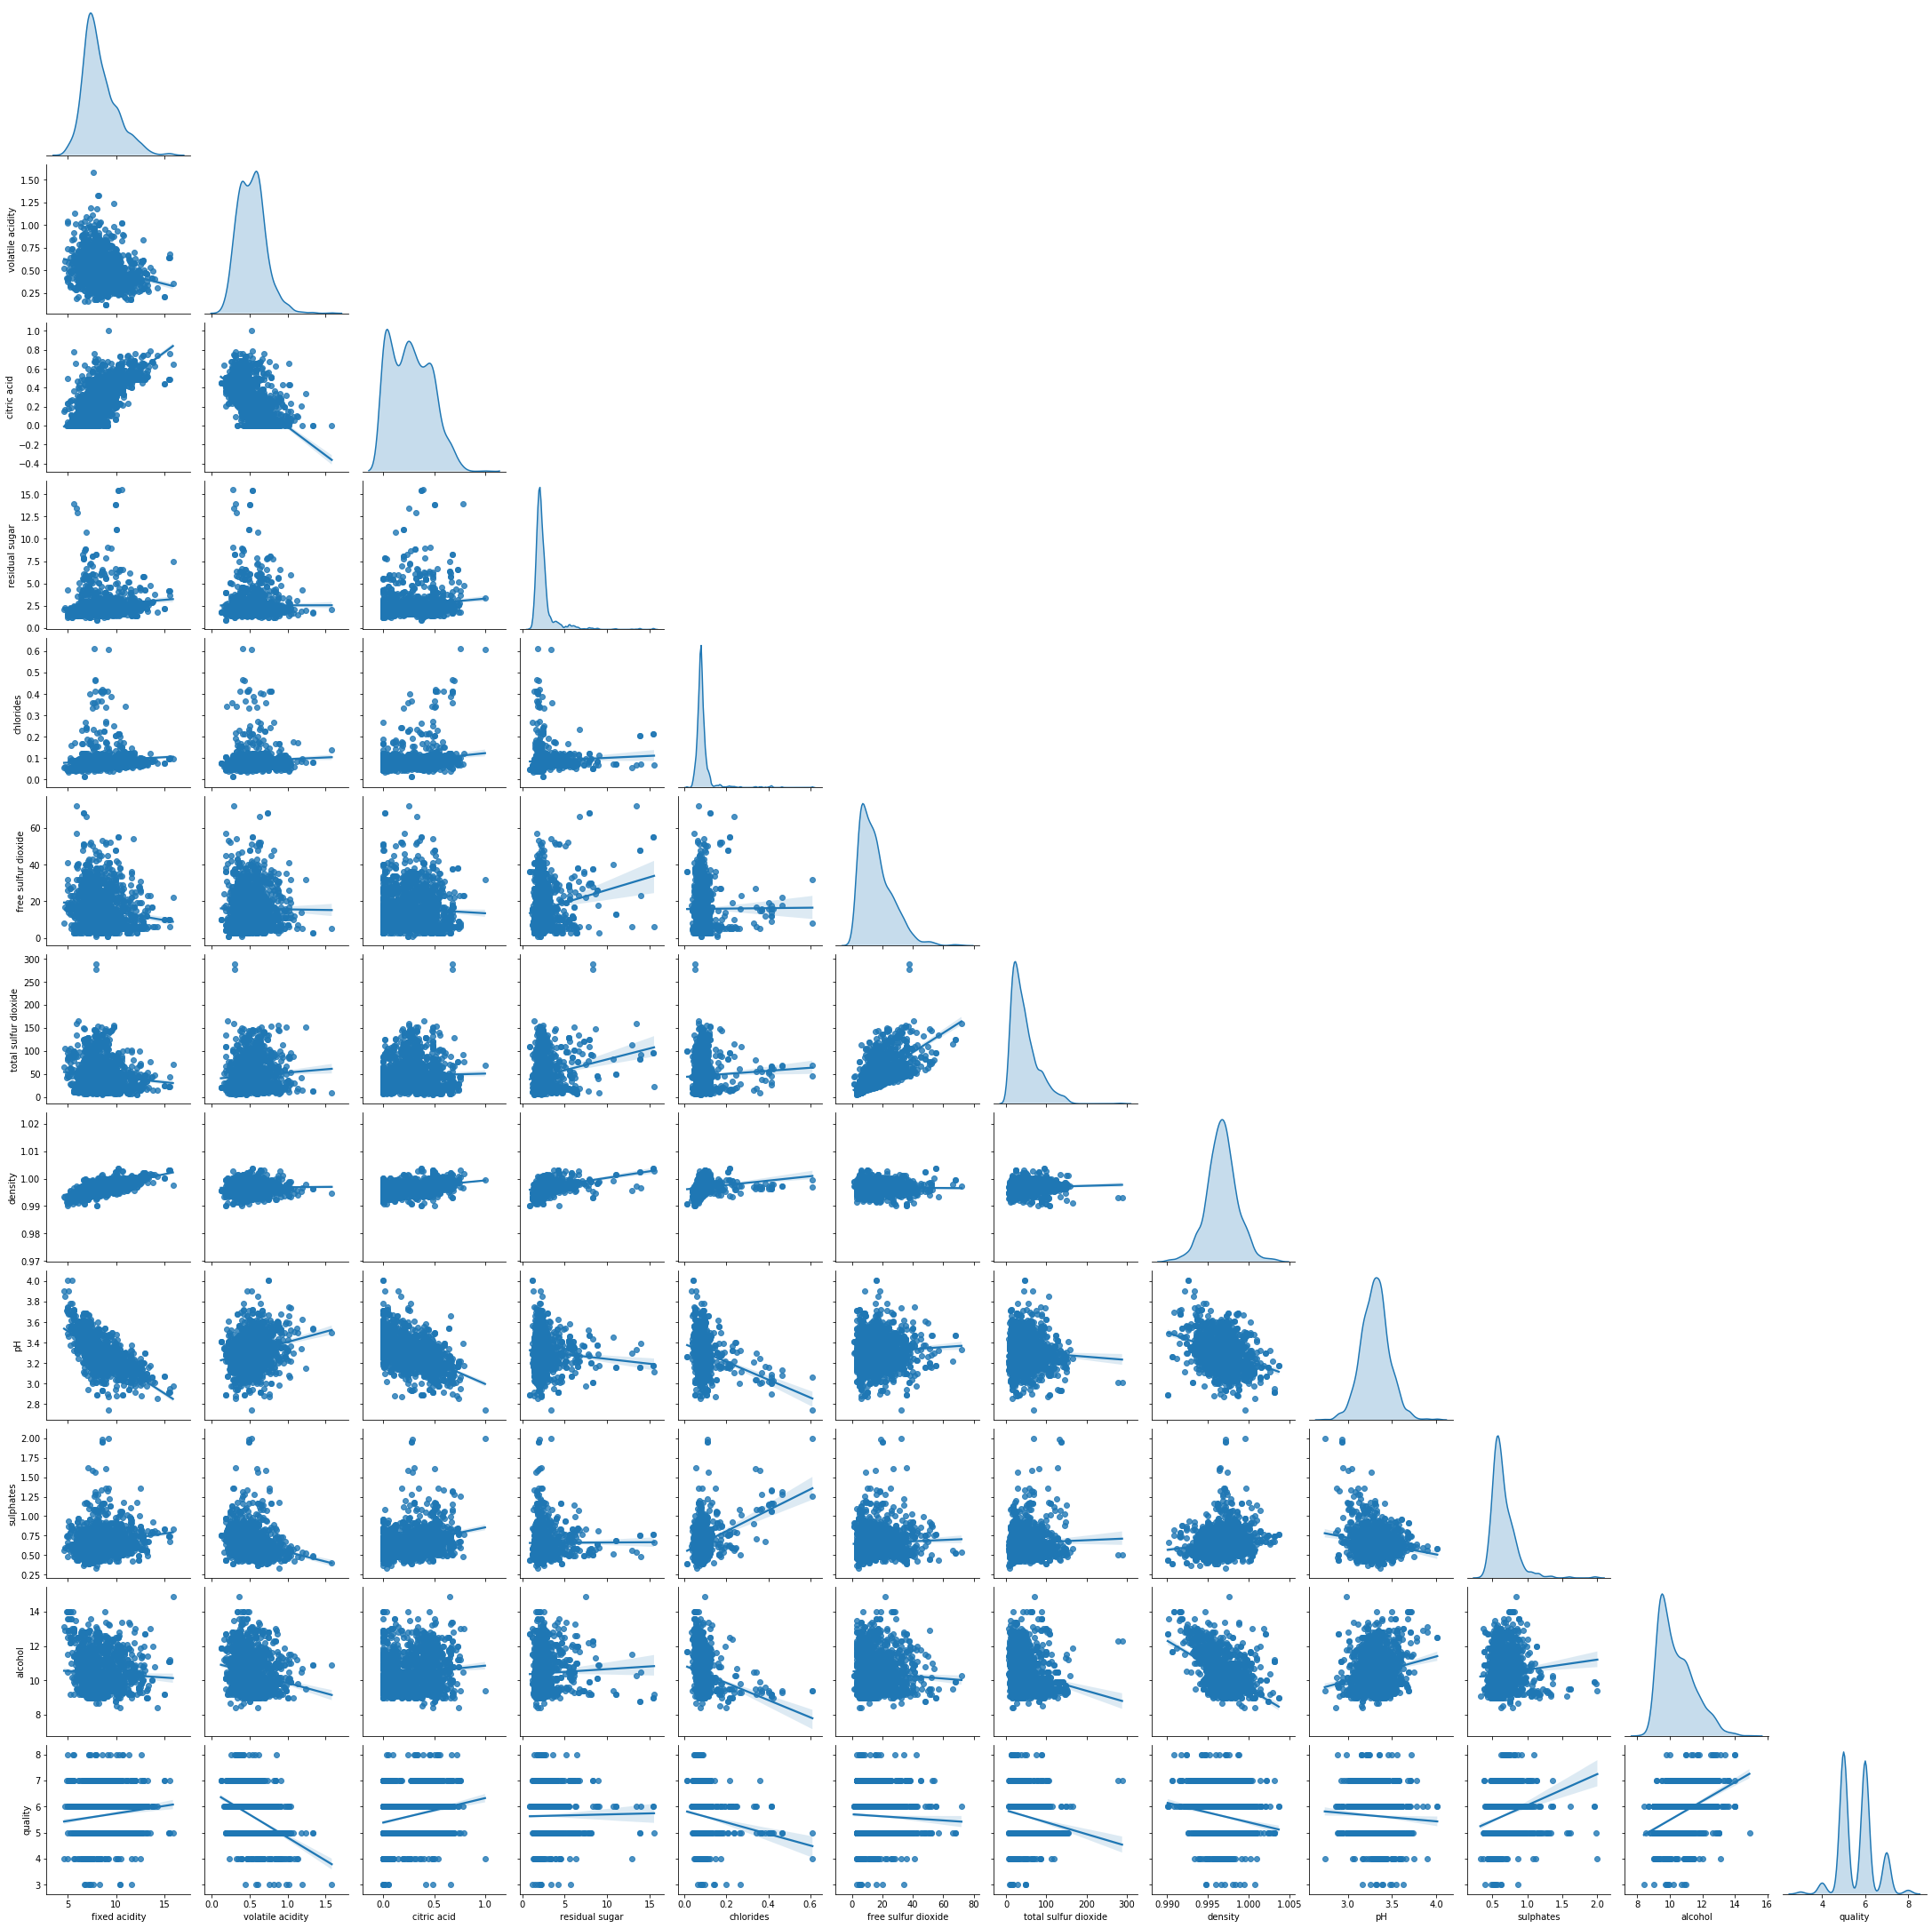

In [23]:
pairs = sns.pairplot(data, 
                     corner = True, 
                     diag_kind = "kde", 
                     kind = "reg")

In [27]:
#separate target and input features. we are trying to predict quality
y = data.quality
X = data.drop('quality', axis=1)

In [28]:
# set seed to 123, reserve 20% of data for test set to evaluate model
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 123,
                                                   stratify = y)

In [34]:
#standardize data by fitting transformer API
scaler = preprocessing.StandardScaler().fit(X_train)

In [35]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis = 0))
print(X_train_scaled.std(axis = 0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
X_test_scaled =scaler.transform(X_test)
print(X_test_scaled.mean(axis = 0))
print(X_test_scaled.std(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


In [39]:
pipeline = make_pipeline(preprocessing.StandardScaler(),
                        RandomForestRegressor(n_estimators = 100))

In [42]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False))], 'verbose': False, 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestregressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurit

In [44]:
hyperparameters = { 'randomforestregressor__max_features' :['auto','sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [45]:
# cross validation
clf = GridSearchCV(pipeline, hyperparameters, cv = 10)
#fit and tune the model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [46]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto'}


In [48]:
#refit on entire training set
print(clf.refit)

True


In [50]:
y_pred = clf.predict(X_test)

In [52]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.4658945456746777
0.3446440625


In [53]:
#save the model to a .pkl
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [54]:
#load model from .pkl file
clf2 = joblib.load('rf_regressor.pkl')
#predict data set using loaded model 
clf2.predict(X_test)

array([6.6 , 5.66, 4.92, 5.47, 6.49, 5.68, 4.86, 4.69, 5.01, 5.99, 5.16,
       5.67, 5.77, 5.05, 5.79, 5.69, 6.66, 5.74, 5.71, 6.94, 5.55, 5.49,
       5.02, 6.08, 5.89, 5.06, 5.69, 5.16, 5.95, 6.02, 5.89, 6.65, 5.99,
       5.  , 4.84, 5.91, 5.03, 5.91, 4.91, 5.76, 4.87, 5.83, 6.86, 5.12,
       6.13, 5.37, 5.61, 5.47, 5.06, 6.63, 5.92, 5.38, 5.87, 5.17, 5.47,
       5.85, 5.3 , 5.2 , 5.  , 5.31, 5.43, 5.05, 4.98, 5.83, 6.02, 5.34,
       6.38, 5.03, 5.09, 6.64, 5.84, 5.39, 5.05, 4.98, 5.24, 5.97, 5.28,
       5.2 , 5.23, 5.2 , 6.63, 5.48, 6.28, 6.49, 5.09, 5.86, 6.58, 6.27,
       5.53, 5.67, 5.87, 5.31, 6.37, 5.76, 5.58, 5.77, 6.62, 6.76, 5.47,
       6.87, 5.09, 5.41, 5.1 , 6.6 , 5.06, 4.61, 5.69, 5.14, 5.7 , 5.95,
       5.74, 5.56, 6.07, 5.39, 5.1 , 5.18, 5.95, 5.02, 5.01, 6.11, 5.86,
       5.09, 5.82, 5.92, 5.2 , 5.39, 5.27, 5.86, 5.5 , 5.39, 5.67, 6.4 ,
       5.08, 5.2 , 5.02, 6.43, 5.03, 5.19, 6.75, 5.54, 5.16, 5.05, 5.73,
       6.18, 5.41, 5.45, 5.1 , 6.65, 5.62, 5.03, 5.